In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
t = 20 #no. of states
s = np.zeros(t) # State Sequence
y = np.zeros(t) # Measurement Sequence

np.random.seed(30)

s[0] = np.random.normal(0, 1)
y[0] = (0.05*(s[0]**2)) + np.random.normal(0, 0.5)

for i in range(1,t):
    s[i] = (0.5*s[i-1]) + ((25*s[i-1])/(1+(s[i-1]**2))) + (8*np.cos(1.2*(i-1))) + np.random.normal(0, 0.5)
    y[i] = (0.05*(s[i]**2)) + np.random.normal(0, 0.5)

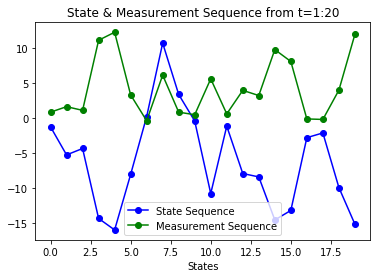

In [4]:
plt.plot(s, 'bo-')
plt.plot(y, 'go-', )
plt.title("State & Measurement Sequence from t=1:{}".format(t))
plt.plot([],[], 'bo-', label='State Sequence')
plt.plot([],[], 'go-', label='Measurement Sequence')
plt.xlabel('States')
plt.legend(loc='best')
plt.show()

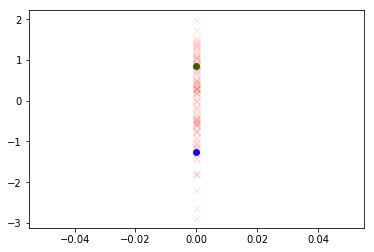

In [28]:
# Initializing particles
N = 100
x = np.zeros((t,N))
w = np.ones((t,N))
x[0] = np.random.normal(0, 1, N) 
w[0] = w[0]/N

plt.plot(s[0], 'bo-')
plt.plot(y[0], 'go-')
for i in range(N):
    plt.plot(x[0,i], 'r', marker='x', alpha=0.1*N*w[0,i], ms=7)
plt.show()

In [25]:
w

array([[0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       [1.  , 1.  , 1.  , ..., 1.  , 1.  , 1.  ],
       [1.  , 1.  , 1.  , ..., 1.  , 1.  , 1.  ],
       ...,
       [1.  , 1.  , 1.  , ..., 1.  , 1.  , 1.  ],
       [1.  , 1.  , 1.  , ..., 1.  , 1.  , 1.  ],
       [1.  , 1.  , 1.  , ..., 1.  , 1.  , 1.  ]])